<a href="https://colab.research.google.com/github/javohir-ergashboyev/ML-projects/blob/main/GDP_China_using_PolynomialREG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: import pandas as pd import numpy as n import pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
df=pd.read_csv(url)
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [26]:
Y=np.asanyarray(df[['Value']]/df['Value'].max())
X=np.asanyarray(df[['Year']]/df['Year'].max())

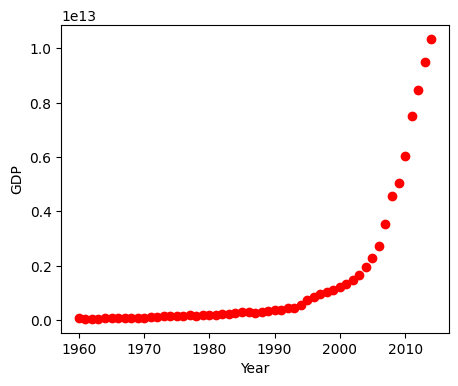

In [27]:
plt.figure(figsize=(5,4))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [28]:
# prompt: using LinearRegression create model

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,Y)


LinearRegression()

In [29]:
# prompt: predict and assign value to yhat

yhat=model.predict(X)


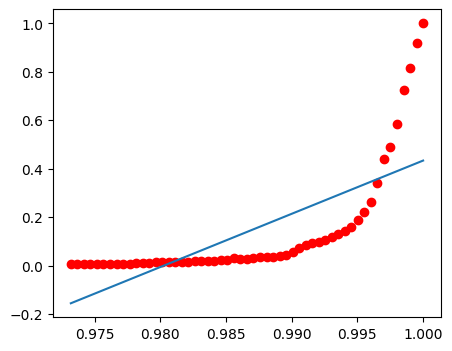

In [37]:
plt.figure(figsize=(5,4))
plt.plot(X, Y, 'ro', label='data')
plt.plot(X, yhat,  label='fit')
plt.show()

In [41]:
# prompt: calculate mean absolute error and assign to MAE

MAE = np.mean(abs(yhat-Y))
MAE

0.12657979406214762

POLYNOMINAL REGRESSION

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=5,include_bias=False)
x_poly=poly_features.fit_transform(X)

In [46]:
model.fit(x_poly, Y)

LinearRegression()

In [47]:
yhat2=model.predict(x_poly)

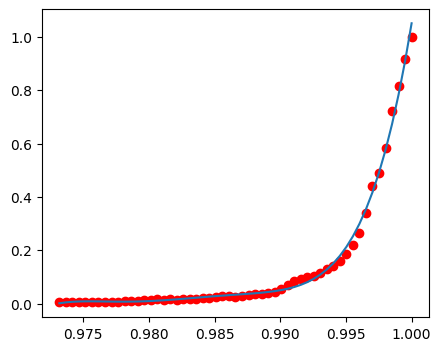

In [48]:
plt.figure(figsize=(5,4))
plt.plot(X, Y, 'ro', label='data')
plt.plot(X, yhat2,  label='fit')
plt.show()

In [50]:
# prompt: calculate mean absolute error for yhat

MAE = np.mean(abs(yhat2-Y))
MAE


0.009253921906050316

In [60]:
x_data, y_data = (df["Year"].values, df["Value"].values)
xdata =x_data/(x_data.max())
ydata =y_data/(max(y_data))


array([5.91841165e+10, 4.95570502e+10, 4.66851785e+10, 5.00973033e+10,
       5.90622549e+10, 6.97091531e+10, 7.58794348e+10, 7.20570286e+10,
       6.99934979e+10, 7.87188205e+10, 9.15062113e+10, 9.85620238e+10,
       1.12159814e+11, 1.36769878e+11, 1.42254742e+11, 1.61162492e+11,
       1.51627687e+11, 1.72349014e+11, 1.48382112e+11, 1.76856525e+11,
       1.89649992e+11, 1.94369049e+11, 2.03549627e+11, 2.28950201e+11,
       2.58082147e+11, 3.07479586e+11, 2.98805793e+11, 2.71349773e+11,
       3.10722214e+11, 3.45957486e+11, 3.58973230e+11, 3.81454704e+11,
       4.24934066e+11, 4.42874596e+11, 5.62261130e+11, 7.32032045e+11,
       8.60844098e+11, 9.58159425e+11, 1.02527690e+12, 1.08944711e+12,
       1.20526068e+12, 1.33223472e+12, 1.46190649e+12, 1.64992872e+12,
       1.94174560e+12, 2.26859890e+12, 2.72978403e+12, 3.52309431e+12,
       4.55843107e+12, 5.05941974e+12, 6.03965851e+12, 7.49243210e+12,
       8.46162316e+12, 9.49060260e+12, 1.03548317e+13])

In [53]:
def sigmoid(x, Beta1,Beta2):
  y=1/(1+np.exp(-Beta1*(x-Beta2)))
  return y

In [61]:
from scipy.optimize import curve_fit
beta,pcov=curve_fit(sigmoid, xdata,ydata)
print(str(beta[1]),' ', str(beta[0]))

0.9972071272529931   690.4517092123388


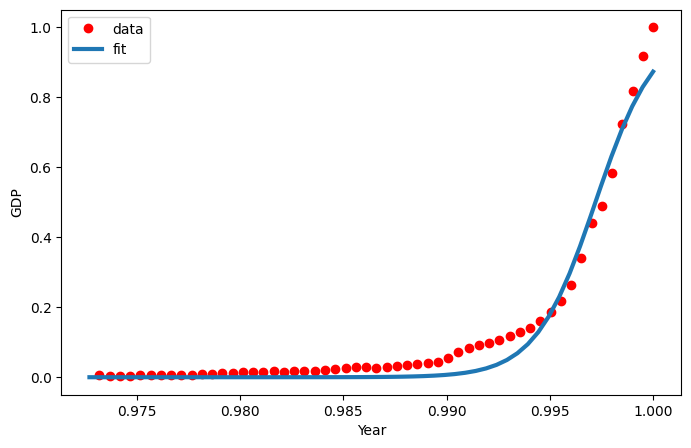

In [62]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
yhat = sigmoid(x, *beta)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [64]:
# prompt: mean absolute error for yhat

MAE = np.mean(abs(yhat-ydata))
MAE


0.030498418823495136